In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bike%20Prices.csv')

In [ ]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


#missing value drop

In [ ]:
df = df.dropna()

In [ ]:
df[['Brand','Model','Seller_Type','Owner']].value_counts()

Brand     Model                         Seller_Type  Owner    
Honda     Honda Activa [2000-2015]      Individual   1st owner    22
          Honda CB Hornet 160R          Individual   1st owner    19
Bajaj     Bajaj Pulsar 180              Individual   1st owner    16
Yamaha    Yamaha FZ S V 2.0             Individual   1st owner    15
Honda     Honda Activa 3G               Individual   1st owner    15
                                                                  ..
Kawasaki  Kawasaki Ninja 300            Individual   1st owner     1
          Kawasaki Ninja 250R           Individual   2nd owner     1
KTM       KTM RC390                     Individual   1st owner     1
          KTM 390 Duke ABS [2013-2016]  Individual   2nd owner     1
Yo        Yo Style                      Individual   1st owner     1
Length: 231, dtype: int64

In [ ]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [ ]:
df['Seller_Type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [ ]:
df['Owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [ ]:
df.replace({'Seller_Type' : {'Individual':0, 'Dealer':1}},inplace = True)

In [ ]:
df.replace({'Owner' : {'1st owner':0, '2nd owner':1, '3rd owner':2,'4th owner':4}},inplace = True)

# feature and label

In [ ]:
y=df['Selling_Price']

In [ ]:
x=df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [ ]:
x

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,4,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test, y_train , y_test = train_test_split(x,y,train_size= 0.7 ,random_state = 12529) # random_state = any number (to fixed  the combination number of random combination )

# Linear Regression Model

In [ ]:
from sklearn.linear_model import  LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train , y_train)

LinearRegression()

#model Prediction 

# Predict Test Data

In [ ]:
y_predict = lr.predict(x_test)

In [ ]:
y_predict.shape

(188,)

In [ ]:
y_predict

array([ 52652.60893422,  39486.41676174, 196562.43198625,  55580.50406346,
        26140.7294817 ,  94608.16940208, 119187.31851386,  68882.3690645 ,
        33660.46971131,  46944.42315337,  53461.39448308,  11010.80661868,
        33332.52261297,  99136.85017253,  53520.69363007,  77889.92667438,
        45898.51705698,  51568.3299629 ,  23936.19734581,  53169.07821732,
        93240.71089046,   -982.05901745,  72782.26710892,  61648.18639175,
        60975.53326568,  29005.69236305,  52733.45578055,  76744.27220676,
        25899.12686651,  38977.3804656 , 136552.24672472,  43207.37077002,
        59999.13518358, 178300.52079438,  56538.55902122,  21881.41938333,
        39242.90242196,  32072.27344395,  54250.50343725,  39760.72648086,
        58983.84447845,  30360.33221383,  53733.14061814,  39812.75115879,
       135490.92768479,  44412.40326896,   7898.88343967,  52017.36847523,
        42026.43374389, 104169.26650705,  60024.05156225, 101703.69488341,
        73823.40634497,  

# Model Accuracy 


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score  # Evaluating


In [ ]:
mean_squared_error(y_test,y_predict)

278752955.62994975

In [ ]:
mean_absolute_error(y_test,y_predict)

11248.186114721228

In [ ]:
mean_absolute_percentage_error(y_test, y_predict)

0.24203412927316265

In [ ]:
r2_score(y_test,y_predict)

0.8481880973590643

* R square is very low signifies need for model improvement

#visualization

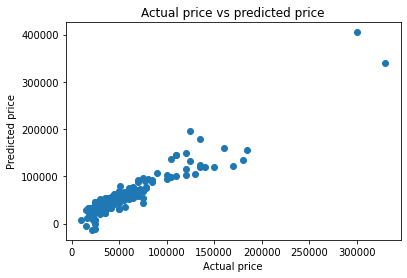

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predict)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs predicted price')
plt.show()


#Get Future Predictictions

let select a random sample from existing dataset as new value
Steps to follow :

1) Extract a random row using sample function

2)Seprate x and y

3)Predict


In [ ]:
df_new = df.sample(1)

In [ ]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
496,Honda,Honda CB Hornet 160R,70000,2018,0,0,7000,92661.0


In [ ]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
496,Honda,Honda CB Hornet 160R,70000,2018,0,0,7000,92661.0


In [ ]:
x_new = df_new.drop(['Brand','Model','Selling_Price'],axis =1)

In [ ]:
y_pred_new = lr.predict(x_new)

In [ ]:
y_pred_new

array([79688.63576276])